In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
train_dataset = pd.read_csv('train set adani.csv')

In [28]:
train_set = train_dataset.iloc[:,1:2].values

In [29]:
train_set[2547,:]

array([485.4])

# Data preprocessing
using normalization instead of standarization

In [30]:
from sklearn.preprocessing import MinMaxScaler


In [31]:
sc = MinMaxScaler(feature_range= (0,1))
scales_train_set = sc.fit_transform(train_set)

In [32]:
x_train = []
y_train = []
for i in range(60 ,2547 ):
    x_train.append(scales_train_set[i-60:i,0])
    y_train.append(scales_train_set[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)    

In [33]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [35]:
regressor = Sequential()

dropouts prevent overfitting


In [36]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [37]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [38]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [39]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [40]:
regressor.add(Dense(units = 1))

In [41]:
regressor.compile(optimizer= 'adam', loss = 'mean_squared_error',metrics = ['accuracy'])

In [42]:
regressor.fit(x_train, y_train, epochs = 150, batch_size = 32 )

Epoch 1/150
78/78 [==============================] - 9s 56ms/step - loss: 0.0202 - accuracy: 8.0418e-04
Epoch 2/150
78/78 [==============================] - 5s 62ms/step - loss: 0.0049 - accuracy: 8.0418e-04
Epoch 3/150
78/78 [==============================] - 5s 58ms/step - loss: 0.0045 - accuracy: 8.0418e-04
Epoch 4/150
78/78 [==============================] - 4s 55ms/step - loss: 0.0045 - accuracy: 8.0418e-04
Epoch 5/150
78/78 [==============================] - 4s 55ms/step - loss: 0.0046 - accuracy: 8.0418e-04
Epoch 6/150
78/78 [==============================] - 5s 65ms/step - loss: 0.0042 - accuracy: 8.0418e-04
Epoch 7/150
78/78 [==============================] - 4s 56ms/step - loss: 0.0037 - accuracy: 8.0418e-04
Epoch 8/150
78/78 [==============================] - 4s 55ms/step - loss: 0.0035 - accuracy: 8.0418e-04
Epoch 9/150
78/78 [==============================] - 4s 56ms/step - loss: 0.0032 - accuracy: 8.0418e-04
Epoch 10/150
78/78 [==============================] - 4s 56ms/st

In [45]:
test_dataset = pd.read_csv('test set adani.csv')
real_test_set = test_dataset.iloc[:,1:2].values

In [46]:
full_dataset = pd.concat((train_dataset['Open'], test_dataset['Open']),axis = 0)
inputs = full_dataset[(len(full_dataset)- len(test_dataset))-60 :].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [48]:
x_test = []
for i in range(60 ,140):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test) 

In [49]:
x_test

array([[0.67448331, 0.66719661, 0.67037626, ..., 0.99894012, 0.99629041,
        1.        ],
       [0.66719661, 0.67037626, 0.66534181, ..., 0.99629041, 1.        ,
        0.99894012],
       [0.67037626, 0.66534181, 0.66149974, ..., 1.        , 0.99894012,
        1.0572337 ],
       ...,
       [1.11354001, 1.08028617, 1.11168521, ..., 1.66520933, 1.65606783,
        1.66136725],
       [1.08028617, 1.11168521, 1.07657658, ..., 1.65606783, 1.66136725,
        1.71436142],
       [1.11168521, 1.07657658, 1.16772655, ..., 1.66136725, 1.71436142,
        1.70959194]])

In [50]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [51]:
predicted_preice = regressor.predict(x_test)
predicted_preice = sc.inverse_transform(predicted_preice)

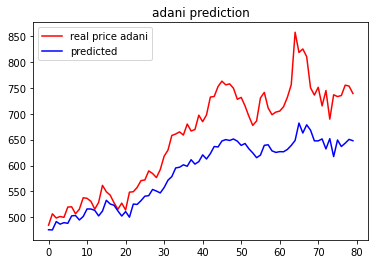

In [52]:
plt.plot(real_test_set, color = 'red', label = 'real price adani')
plt.plot(predicted_preice, color = 'blue', label = 'predicted')
plt.title('adani prediction')
plt.legend()
plt.show()